# **IMU-Project**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

In [2]:
def low_pass_filter(sequence, sampling_frequency, cut_frequency, n):
    nyq = 0.5 * sampling_frequency
    cutoff = cut_frequency / nyq
    b, a = signal.butter(n, cutoff)
    return signal.filtfilt(b, a, sequence)

## **Handheld**

In [3]:
dataset = pd.read_csv("handheld_60hz_15step.csv")
dataset.head()

,timestamp,acc_x,acc_y,acc_z,gyro_x,gyro_y,gyro_z,gravity_x,gravity_y,gravity_z,pedo
0,1628839782133,-1.070779,5.782685,6.761238,-0.365252,-0.176834,-0.067644,-1.053474,5.766927,7.865676,15
1,1628839782150,-0.936632,5.582663,8.366209,-0.509063,-0.340884,-0.116646,-1.025905,5.712847,7.908667,15
2,1628839782166,-1.003706,5.410787,9.857394,-0.432364,-0.168312,-0.147539,-1.001615,5.648099,7.958131,15
3,1628839782183,-1.199536,5.177228,9.596886,-0.180962,0.109722,-0.142213,-1.008865,5.599792,7.991285,15
4,1628839782199,-1.343265,4.958042,8.650073,0.017177,0.101200,-0.077232,-1.041677,5.576595,8.003287,15


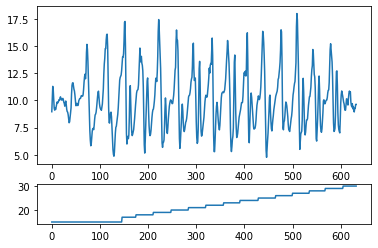

In [4]:
fig, axs = plt.subplots(2, 1, gridspec_kw={'height_ratios': [4, 1]})
axs[0].plot(l2ed := np.linalg.norm(dataset[["acc_x", "acc_y", "acc_z"]], axis=1))
axs[1].plot(dataset.pedo)
plt.show()

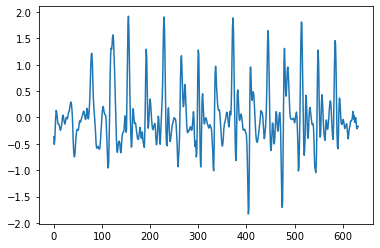

In [5]:
plt.plot(dataset.gyro_x)

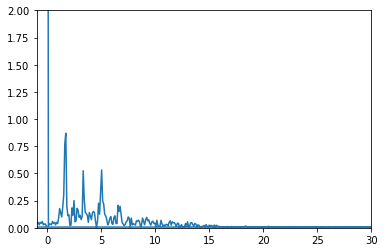

In [6]:
plt.plot(np.fft.fftfreq(len(l2ed), 1/60), abs(np.fft.fft(l2ed))/len(l2ed))
plt.xlim(-1, 30)
plt.ylim(0, 2)
plt.show()

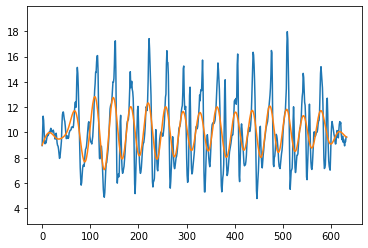

In [7]:
plt.plot(l2ed)
plt.plot(y := low_pass_filter(l2ed, 60, 1.8, 5))
plt.ylim(min(l2ed) - 2, max(l2ed) + 2)
plt.show()

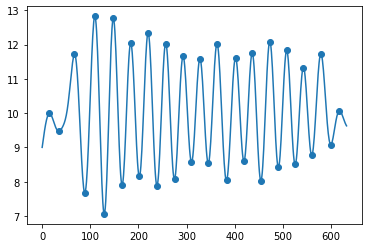

16


In [8]:
xs = np.append(signal.find_peaks(-y)[0], signal.find_peaks(y)[0])
ys = [y[x] for x in xs]
plt.scatter(xs, ys)
plt.plot(y)
plt.show()
print(len(xs)//2)

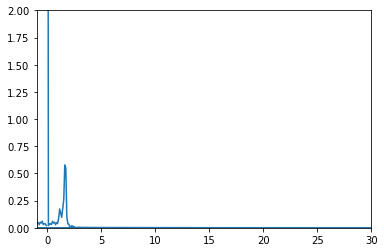

In [9]:
plt.plot(np.fft.fftfreq(len(l2ed), 1/60), abs(np.fft.fft(y))/len(l2ed))
plt.xlim(-1, 30)
plt.ylim(0, 2)
plt.show()

## **Hip Pocket**

In [10]:
dataset = pd.read_csv("hippocket_60hz_15step.csv")
dataset.head()

,timestamp,acc_x,acc_y,acc_z,gyro_x,gyro_y,gyro_z,gravity_x,gravity_y,gravity_z,pedo
0,1627739460357,-1.186361,3.720178,8.092525,0.288820,-0.602407,0.100934,-0.554377,3.246986,9.240446,0
1,1627739460373,-0.665344,3.981884,8.948909,0.178032,-0.699346,0.012517,-0.459484,3.283870,9.232615,0
2,1627739460390,-0.594079,3.857918,10.147247,0.126900,-0.467118,-0.083357,-0.377262,3.303021,9.229509,0
3,1627739460406,-0.961785,3.772280,10.180185,0.216382,-0.197606,-0.144077,-0.334455,3.325212,9.223188,0
4,1627739460422,-0.852192,3.596212,9.436988,0.235556,0.065514,-0.169643,-0.332985,3.358588,9.211141,0


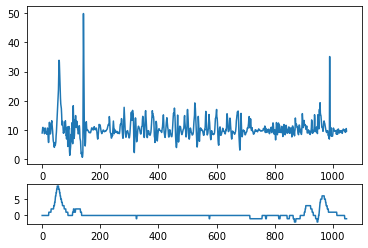

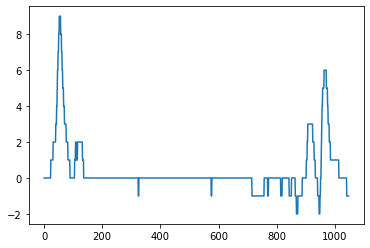

In [11]:
fig, axs = plt.subplots(2, 1, gridspec_kw={'height_ratios': [4, 1]})
axs[0].plot(l2ed := np.linalg.norm(dataset[["acc_x", "acc_y", "acc_z"]], axis=1))
axs[1].plot(dataset.pedo)
plt.show()
plt.plot(dataset.pedo)

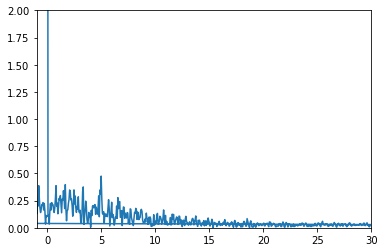

In [12]:
plt.plot(np.fft.fftfreq(len(l2ed), 1/60), abs(np.fft.fft(l2ed))/len(l2ed))
plt.xlim(-1, 30)
plt.ylim(0, 2)
plt.show()

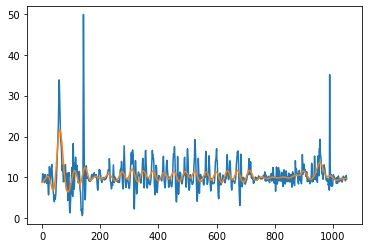

In [13]:
plt.plot(l2ed)
plt.plot(y := low_pass_filter(l2ed, 60, 1.8, 5))
plt.ylim(min(l2ed) - 2, max(l2ed) + 2)
plt.show()

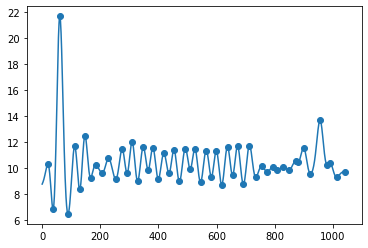

In [14]:
xs = np.append(signal.find_peaks(-y)[0], signal.find_peaks(y)[0])
ys = [y[x] for x in xs]
plt.scatter(xs, ys)
plt.plot(y)
plt.show()

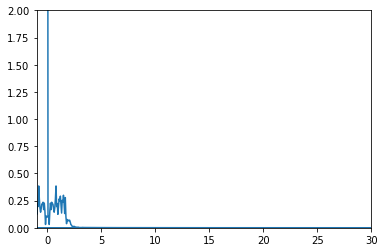

In [15]:
plt.plot(np.fft.fftfreq(len(l2ed), 1/60), abs(np.fft.fft(y))/len(l2ed))
plt.xlim(-1, 30)
plt.ylim(0, 2)
plt.show()

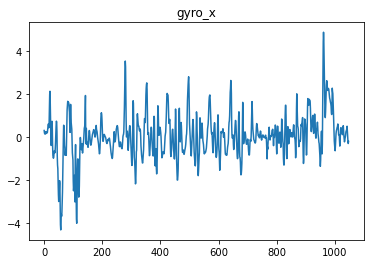

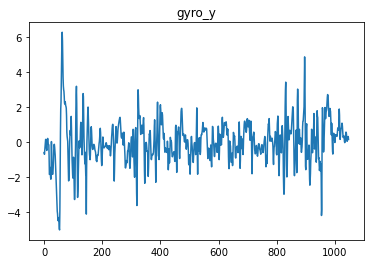

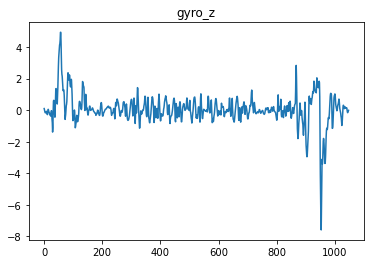

In [16]:
for cal in ["gyro_x", "gyro_y", "gyro_z"]:
    plt.plot(pd.read_csv("hippocket_60hz_15step.csv")[[cal]])
    plt.title(cal)
    plt.show()

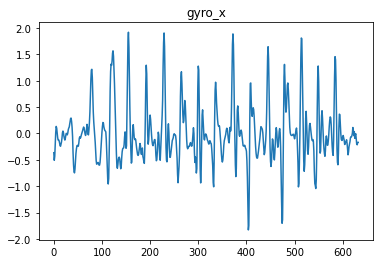

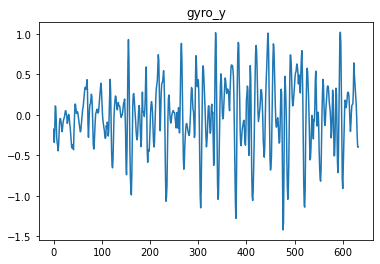

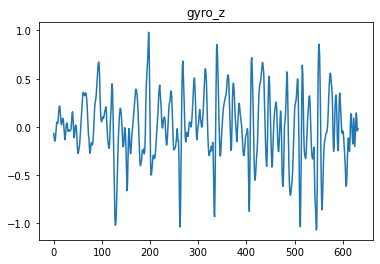

In [17]:
dataset = pd.read_csv("handheld_60hz_15step.csv")
for gyro in ["gyro_x", "gyro_y", "gyro_z"]:
    plt.plot(dataset[[gyro]])
    plt.title(gyro)
    plt.show()
plt.show()